In [1]:
# Okay, let's get the proper transformations, and also get all the predictions on a subwindow scale - Later as a proof of concept, we will separate the sequences with densities all zero and see how the predicted densities look like.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import os
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy.stats import pearsonr

In [3]:
# path to dataframes
path_to_dfs = "suggestion_2/forecasted_counts/block_0103"

In [4]:
len(os.listdir(path_to_dfs))

6370

In [5]:
len(os.listdir(path_to_dfs)) / 910

7.0

In [6]:
averaged_forecasts_csvs = []
for file in os.listdir(path_to_dfs):
    if file[:8] =='averaged':
        averaged_forecasts_csvs.append(file)

In [7]:
# how many csv files do we have?
len(averaged_forecasts_csvs)

910

In [8]:
averaged_forecasts_csvs[0]

'averaged_forecasts_sub_653.csv'

In [9]:
# let's create these names in the order of the subwindows
ordered_csv_files = ['averaged_forecasts_sub_' + str(i) + '.csv' for i in range(910)]

In [10]:
# ordered_csv_files

In [11]:
%%time
all_dfs = []
for file in ordered_csv_files:
    read_df = pd.read_csv(path_to_dfs + '/' + file)
    all_dfs.append(read_df)

CPU times: user 453 ms, sys: 20.5 ms, total: 474 ms
Wall time: 476 ms


In [12]:
# make a single dataframe out of the many
combined_df = pd.concat(all_dfs, axis = 1)

In [13]:
combined_df.head()

,True_value,Forecasted_value,True_value,Forecasted_value,True_value,Forecasted_value,True_value,Forecasted_value,True_value,Forecasted_value,...,True_value,Forecasted_value,True_value,Forecasted_value,True_value,Forecasted_value,True_value,Forecasted_value,True_value,Forecasted_value
0,0.0,-0.008622,0.0,-0.004020,0.0,-0.013600,0.0,-0.016808,0.000005,-0.003117,...,0.0,-0.007105,0.0,-0.012972,0.0,-0.008735,0.0,0.002620,0.0,0.005498
1,0.0,-0.003352,0.0,-0.001749,0.0,-0.005783,0.0,0.007102,0.064341,0.000372,...,0.0,0.000033,0.0,-0.001411,0.0,0.000213,0.0,0.000874,0.0,0.001592
2,0.0,-0.003265,0.0,-0.003800,0.0,-0.001575,0.0,0.001654,0.000000,-0.000544,...,0.0,-0.004479,0.0,-0.006052,0.0,-0.002207,0.0,-0.006147,0.0,-0.003249
3,0.0,-0.002662,0.0,-0.003518,0.0,0.004136,0.0,0.011356,0.000000,0.001134,...,0.0,-0.001618,0.0,0.006355,0.0,0.001497,0.0,-0.000994,0.0,0.003673
4,0.0,-0.003706,0.0,-0.004616,0.0,-0.001090,0.0,-0.006067,0.000000,0.001924,...,0.0,-0.002414,0.0,0.002233,0.0,0.002590,0.0,-0.004778,0.0,0.003327


In [14]:
combined_df.shape

(7, 1820)

In [15]:
# get the true values
True_values_df = combined_df[['True_value']]

In [16]:
True_values_df.head()

,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,...,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value
0,0.0,0.0,0.0,0.0,0.000005,0.000668,1.044816e-07,0.0,0.0,0.0,...,0.0,0.000000e+00,0.000000,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.064341,0.087708,0.000000e+00,0.0,0.0,0.0,...,0.0,0.000000e+00,0.000000,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.000000,0.042056,1.144163e-02,0.0,0.0,0.0,...,0.0,7.683623e-10,0.000005,4.013955e-08,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000e+00,0.0,0.0,0.0,...,0.0,2.402785e-05,0.000649,8.526243e-09,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000e+00,0.0,0.0,0.0,...,0.0,7.268980e-04,0.003864,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
True_values_df.shape

(7, 910)

In [18]:
# get the proper counts? - Do the transformation
exp_true = np.exp(True_values_df)-1

In [19]:
exp_true

,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,...,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value
0,0.0,0.0,0.0,0.0,5.458158e-06,0.000668,1.044816e-07,0.0,0.0,0.0,...,0.000000,0.000000e+00,0.000000,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,6.645597e-02,0.091669,0.000000e+00,0.0,0.0,0.0,...,0.000000,0.000000e+00,0.000000,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.000000e+00,0.042952,1.150733e-02,0.0,0.0,0.0,...,0.000000,7.683623e-10,0.000005,4.013955e-08,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.000000e+00,0.000000,0.000000e+00,0.0,0.0,0.0,...,0.000000,2.402814e-05,0.000650,8.526243e-09,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.000000e+00,0.000000,0.000000e+00,0.0,0.0,0.0,...,0.000000,7.271623e-04,0.003871,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,6.876971e-07,0.022043,5.086000e-04,0.0,0.0,0.0,...,0.000000,2.217396e-03,0.005884,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.000000e+00,0.000000,0.000000e+00,0.0,0.0,0.0,...,0.022043,9.133409e-06,0.054010,4.412074e-04,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
# not sure if the aggregation is necessary at this point - but let's do it anyway?
sum_true_values = exp_true.sum(axis = 1)

In [21]:
sum_true_values

0    40.000661
1    39.000002
2    41.000000
3    31.000000
4    32.000000
5    40.002086
6    27.000176
dtype: float64

In [22]:
# now what about the predicted values? we have stored these in terms of npy files, let's see how we can figure out to get the predicted values

In [23]:
# Okay, question here, not sure how the forecasted values were computed, hopefully we figure out what exatctly we need by the end of this script

In [24]:
all_forecasts_npy_files = []
for file in os.listdir(path_to_dfs):
    if file[:13] == 'all_forecasts':
        all_forecasts_npy_files.append(file)

In [25]:
len(all_forecasts_npy_files)

910

In [26]:
all_forecasts_npy_files[0]

'all_forecasts_sub_273.npy'

In [27]:
# load just the first file
sub_273_forecasts = np.load(os.path.join(path_to_dfs, all_forecasts_npy_files[0]))

In [28]:
sub_273_forecasts.shape

(1000, 4, 7)

In [29]:
# Okay, so for the subwindow 273 -  this file seem to have all the 1000 values in the 4 chains for all the test time points in the sequence

In [30]:
# transform these values?
sub_273_forecasts = np.exp(sub_273_forecasts) - 1

In [31]:
sub_273_forecasts.min(), sub_273_forecasts.max()

(-0.5817418, 1.3388767)

In [32]:
# get rid of anything below zero?
sub_273_forecasts[sub_273_forecasts < 0] = 0

In [33]:
sub_273_forecasts.min(), sub_273_forecasts.max()

(0.0, 1.3388767)

In [34]:
# cool -  what does these values mean?

In [35]:
# try averaging the forecasted values along the 0th and 1st axis?

In [36]:
sub_273_forecasts_averged = np.mean(sub_273_forecasts, axis = (0,1))

In [37]:
sub_273_forecasts_averged

array([0.08164553, 0.0923226 , 0.10251123, 0.08284499, 0.07603387,
       0.08263696, 0.07563087], dtype=float32)

In [38]:
sub_273_forecasts_averged.shape

(7,)

In [39]:
# sanity check

In [40]:
# sanity check
for i in range(sub_273_forecasts.shape[-1]):
    track = sub_273_forecasts[:,:,i]
    print(np.mean(track))

0.08164551
0.092322685
0.10251129
0.08284498
0.07603386
0.08263696
0.075630836


In [41]:
# Verify the shape of the true values - these are at a subwindow level, and we can use these as they are for getting the metrics, and the scatterplots?

In [42]:
exp_true.shape

(7, 910)

In [43]:
# Okay, we need the predictions for the subwindows in the same shape? - but before that, we need to do the transformation for all the npy files. We can do this in a loop - we have done this before, use the code as it is.

In [44]:
%%time
catch_all_averaged_preds = []
for i in range(910):
    file_name = "all_forecasts_sub_" + str(i) + '.npy'
    al_forecasts_npy_file = np.load(os.path.join(path_to_dfs, file_name))
    # make the conversion
    sub_window_forecasts = np.exp(al_forecasts_npy_file) - 1
    # get rid of anything below zero?
    sub_window_forecasts[sub_window_forecasts < 0] = 0
    # get averages over time 
    sub_window_forecasts_averaged = np.mean(sub_window_forecasts, axis = (0,1))
    catch_all_averaged_preds.append(sub_window_forecasts_averaged)    

CPU times: user 250 ms, sys: 38.6 ms, total: 289 ms
Wall time: 290 ms


In [45]:
len(catch_all_averaged_preds)

910

In [46]:
catch_all_averaged_preds[0]

array([0.00169627, 0.00161518, 0.00126217, 0.0022443 , 0.00151563,
       0.00195062, 0.00083114], dtype=float32)

In [47]:
Forecasted_values_df = pd.DataFrame(catch_all_averaged_preds).T

In [48]:
Forecasted_values_df.shape

(7, 910)

In [49]:
Forecasted_values_df.head()

,0,1,2,3,4,5,6,7,8,9,...,900,901,902,903,904,905,906,907,908,909
0,0.001696,0.002220,0.003154,0.000176,0.001956,0.128277,0.108066,0.096282,0.003531,0.001232,...,0.002839,0.029648,0.052822,0.013623,0.009457,0.001279,0.001267,0.005241,0.006752,0.011083
1,0.001615,0.005064,0.001012,0.010792,0.003058,0.122532,0.114298,0.093087,0.005397,0.001634,...,0.004411,0.021477,0.059721,0.014111,0.004458,0.003992,0.001750,0.002515,0.004971,0.006419
2,0.001262,0.003018,0.002235,0.007898,0.002563,0.117810,0.119142,0.094909,0.001955,0.001620,...,0.001764,0.026607,0.064786,0.006969,0.002258,0.001154,0.000910,0.001474,0.005414,0.001802
3,0.002244,0.002367,0.006895,0.013650,0.003408,0.126525,0.112311,0.101611,0.009364,0.002451,...,0.002244,0.016547,0.051388,0.001404,0.003666,0.001416,0.007080,0.003480,0.004549,0.006843
4,0.001516,0.001279,0.001122,0.001045,0.003023,0.133802,0.167580,0.084935,0.002910,0.002066,...,0.005639,0.015649,0.053376,0.003913,0.008664,0.000802,0.003198,0.004790,0.001909,0.007871


In [50]:
# give column names here
Forecasted_values_df.columns = ['forecaster_val_' + str(i) for i in range(910)]

In [51]:
Forecasted_values_df.head()

,forecaster_val_0,forecaster_val_1,forecaster_val_2,forecaster_val_3,forecaster_val_4,forecaster_val_5,forecaster_val_6,forecaster_val_7,forecaster_val_8,forecaster_val_9,...,forecaster_val_900,forecaster_val_901,forecaster_val_902,forecaster_val_903,forecaster_val_904,forecaster_val_905,forecaster_val_906,forecaster_val_907,forecaster_val_908,forecaster_val_909
0,0.001696,0.002220,0.003154,0.000176,0.001956,0.128277,0.108066,0.096282,0.003531,0.001232,...,0.002839,0.029648,0.052822,0.013623,0.009457,0.001279,0.001267,0.005241,0.006752,0.011083
1,0.001615,0.005064,0.001012,0.010792,0.003058,0.122532,0.114298,0.093087,0.005397,0.001634,...,0.004411,0.021477,0.059721,0.014111,0.004458,0.003992,0.001750,0.002515,0.004971,0.006419
2,0.001262,0.003018,0.002235,0.007898,0.002563,0.117810,0.119142,0.094909,0.001955,0.001620,...,0.001764,0.026607,0.064786,0.006969,0.002258,0.001154,0.000910,0.001474,0.005414,0.001802
3,0.002244,0.002367,0.006895,0.013650,0.003408,0.126525,0.112311,0.101611,0.009364,0.002451,...,0.002244,0.016547,0.051388,0.001404,0.003666,0.001416,0.007080,0.003480,0.004549,0.006843
4,0.001516,0.001279,0.001122,0.001045,0.003023,0.133802,0.167580,0.084935,0.002910,0.002066,...,0.005639,0.015649,0.053376,0.003913,0.008664,0.000802,0.003198,0.004790,0.001909,0.007871


In [52]:
exp_true.columns = ['True_val_' + str(i) for i in range(910)]

In [53]:
exp_true.head()

,True_val_0,True_val_1,True_val_2,True_val_3,True_val_4,True_val_5,True_val_6,True_val_7,True_val_8,True_val_9,...,True_val_900,True_val_901,True_val_902,True_val_903,True_val_904,True_val_905,True_val_906,True_val_907,True_val_908,True_val_909
0,0.0,0.0,0.0,0.0,0.000005,0.000668,1.044816e-07,0.0,0.0,0.0,...,0.0,0.000000e+00,0.000000,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.066456,0.091669,0.000000e+00,0.0,0.0,0.0,...,0.0,0.000000e+00,0.000000,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.000000,0.042952,1.150733e-02,0.0,0.0,0.0,...,0.0,7.683623e-10,0.000005,4.013955e-08,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000e+00,0.0,0.0,0.0,...,0.0,2.402814e-05,0.000650,8.526243e-09,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000e+00,0.0,0.0,0.0,...,0.0,7.271623e-04,0.003871,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0


In [54]:
# I think at this point we can go ahead and get the metrics for inference computed?

In [55]:
# exp_true.keys()

In [56]:
# exp_true.values.shape

In [57]:
# use one column for both dataframes? that way it will be easier to compute the metrics?

In [58]:
# Also something to keep in mind here is that the subwindow sizes are very small - 30*30 - this was intentional as we had to do the seq-2-seq model and they are data hungry - therefore having a 300*300 window size was not feasible

In [59]:
exp_true_onecol = pd.DataFrame(exp_true.to_numpy().ravel(), columns=["True_values"])

In [60]:
exp_true_onecol.head()

,True_values
0,0.000000
1,0.000000
2,0.000000
3,0.000000
4,0.000005


In [61]:
exp_true_onecol.shape

(6370, 1)

In [62]:
exp_predicted_onecol = pd.DataFrame(Forecasted_values_df.to_numpy().ravel(), columns=["Forecasted_values"])

In [63]:
exp_predicted_onecol.head()

,Forecasted_values
0,0.001696
1,0.002220
2,0.003154
3,0.000176
4,0.001956


In [64]:
exp_predicted_onecol.shape

(6370, 1)

In [65]:
# compute the metrics - these would look really small as the values we have are really small

In [66]:
# blockwise mean squared error
rmse = np.sqrt(mean_squared_error(exp_true_onecol['True_values'], exp_predicted_onecol['Forecasted_values']))
rmse

0.16820167835759783

In [67]:
mae = mean_absolute_error(exp_true_onecol['True_values'], exp_predicted_onecol['Forecasted_values'])
mae

0.06729199816914758

In [68]:
corr = pearsonr(exp_true_onecol['True_values'], exp_predicted_onecol['Forecasted_values'])
corr[0]

0.2522818221695938

In [69]:
r2 = r2_score(exp_true_onecol['True_values'], exp_predicted_onecol['Forecasted_values'])
r2

-0.13704481024621673

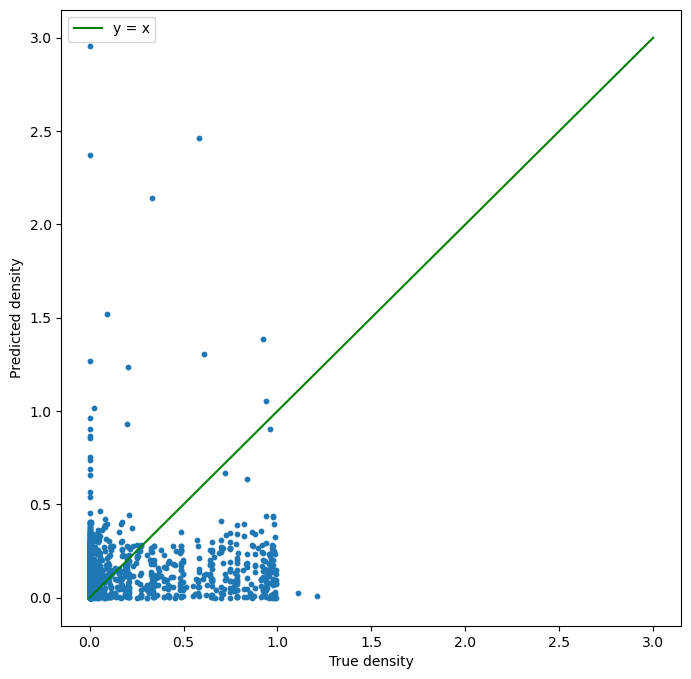

In [70]:
plt.figure(figsize = (8,8))
plt.scatter(exp_true_onecol['True_values'], exp_predicted_onecol['Forecasted_values'], s = 10)
plt.xlabel("True density")
plt.ylabel("Predicted density")
# Add the y = x line
plt.plot([0, 3], [0, 3], color='green', label='y = x')
plt.legend()
plt.show()

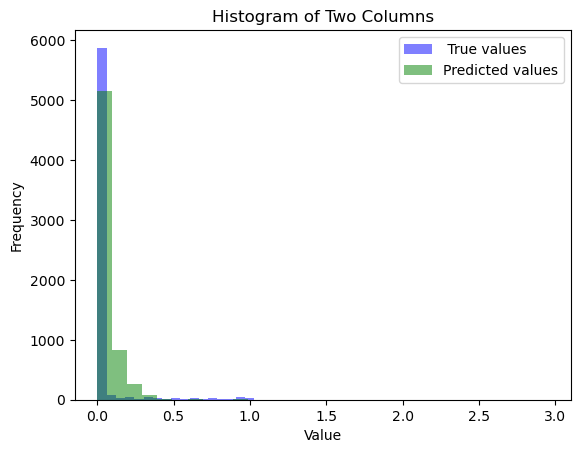

In [129]:
# At this point let's look at the true and predicted value distributions - overlay the histograms

# Plot histogram of two columns
plt.hist(exp_true_onecol['True_values'], 
         bins=20, 
         label=[' True values'], 
         alpha=0.5, color = 'blue')  # alpha = transparency
plt.hist(exp_predicted_onecol['Forecasted_values'], 
         bins=30, 
         label=['Predicted values'], 
         alpha=0.5, color = 'green') 
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title("Histogram of Two Columns")
plt.legend()
plt.show()

In [71]:
# Should we try to get the values separated by 0s?

In [72]:
# how to do this? Maybe we need to take the indices from the true values df, and subset accordingly?

In [73]:
# so create a mask 0 with the true values 0s - we need the indices of this

In [74]:
mask_zero = exp_true_onecol['True_values'].eq(0)

In [75]:
# separate the zero and non-zero indices
idx_zero = exp_true_onecol.index[mask_zero]
idx_nonzero = exp_true_onecol.index[-mask_zero]

In [76]:
# how many zero values?
idx_zero.shape

(4774,)

In [77]:
910*7

6370

In [78]:
# how many non-zeor values
idx_nonzero.shape

(1596,)

In [79]:
# sanity check
idx_nonzero.shape[0] + idx_zero.shape[0]

6370

In [80]:
# Subset both dataframes with the same indices
df_true_zero  = exp_true_onecol.loc[idx_zero]
df_pred_zero  = exp_predicted_onecol.loc[idx_zero]
df_true_nz    = exp_true_onecol.loc[idx_nonzero]
df_pred_nz    = exp_predicted_onecol.loc[idx_nonzero]

In [81]:
df_true_zero.shape, df_pred_zero.shape

((4774, 1), (4774, 1))

In [82]:
df_true_zero.head()

,True_values
0,0.0
1,0.0
2,0.0
3,0.0
7,0.0


In [83]:
df_pred_zero.head()

,Forecasted_values
0,0.001696
1,0.002220
2,0.003154
3,0.000176
7,0.096282


In [84]:
df_true_nz.head()

,True_values
4,5.458158e-06
5,6.681569e-04
6,1.044816e-07
13,1.150733e-02
14,4.295243e-02


In [85]:
df_pred_nz.head()

,Forecasted_values
4,0.001956
5,0.128277
6,0.108066
13,0.179381
14,0.256895


In [86]:
# create the separate scatterplots for these

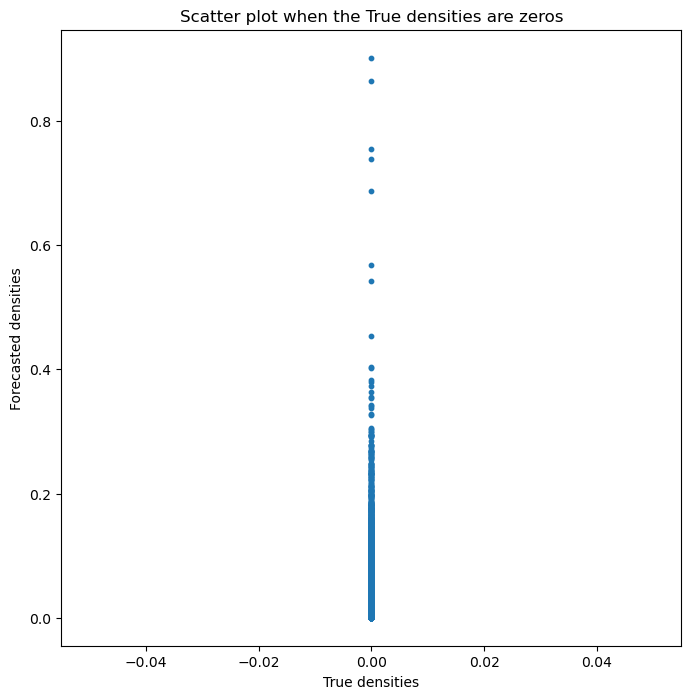

In [87]:
# For zero-data
plt.figure(figsize = (8,8))
plt.scatter(df_true_zero['True_values'], df_pred_zero['Forecasted_values'], s = 10)
plt.title("Scatter plot when the True densities are zeros")
plt.xlabel("True densities")
plt.ylabel("Forecasted densities")
plt.show()

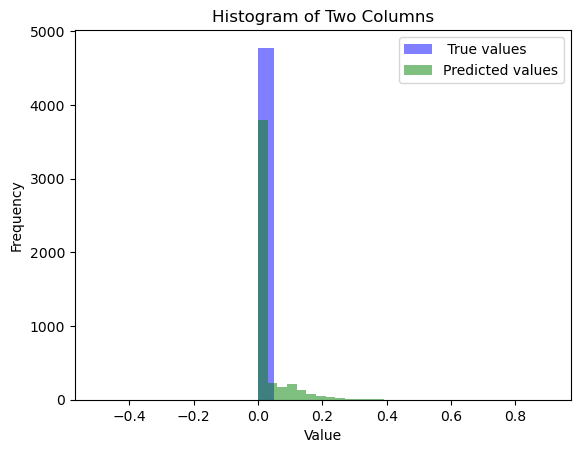

In [130]:
# Plot histogram of two columns
plt.hist(df_true_zero['True_values'], 
         bins=20, 
         label=[' True values'], 
         alpha=0.5, color = 'blue')  # alpha = transparency
plt.hist(df_pred_zero['Forecasted_values'], 
         bins=30, 
         label=['Predicted values'], 
         alpha=0.5, color = 'green') 
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title("Histogram of Two Columns")
plt.legend()
plt.show()

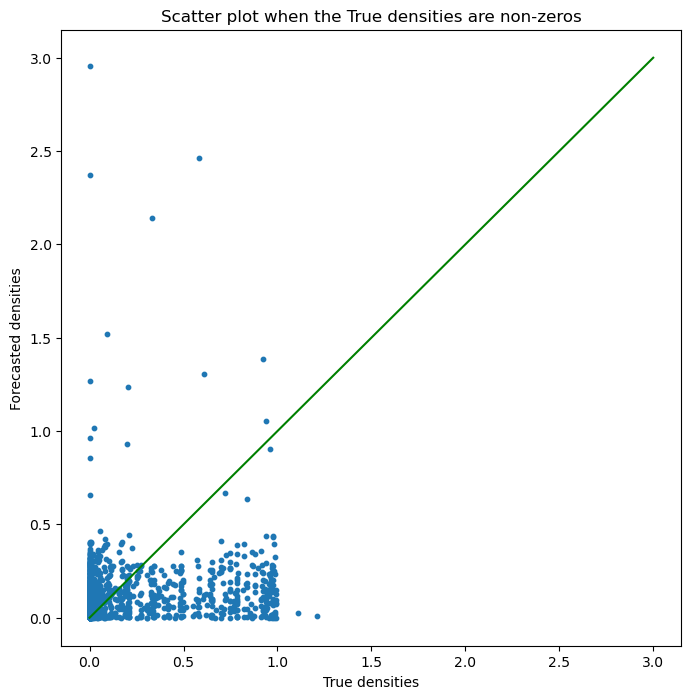

In [88]:
# For non-zero data
plt.figure(figsize = (8,8))
plt.scatter(df_true_nz['True_values'], df_pred_nz['Forecasted_values'], s = 10)
plt.title("Scatter plot when the True densities are non-zeros")
# also plot the y = x line?
plt.plot([0, 3], [0, 3], color='green', label='y = x')
plt.xlabel("True densities")
plt.ylabel("Forecasted densities")
plt.show()

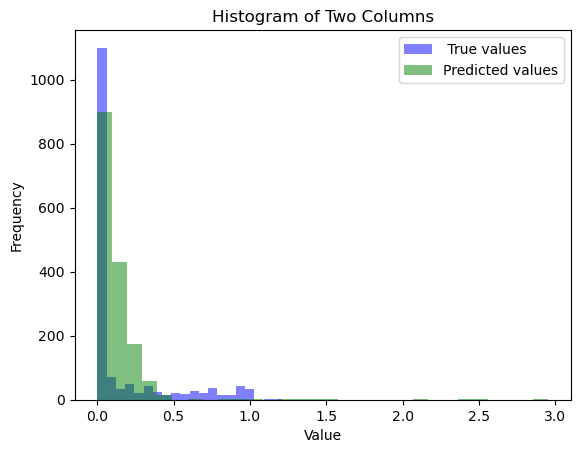

In [131]:
# Plot histogram of two columns
plt.hist(df_true_nz['True_values'], 
         bins=20, 
         label=[' True values'], 
         alpha=0.5, color = 'blue')  # alpha = transparency
plt.hist(df_pred_nz['Forecasted_values'], 
         bins=30, 
         label=['Predicted values'], 
         alpha=0.5, color = 'green') 
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title("Histogram of Two Columns")
plt.legend()
plt.show()

In [89]:
# not that great - but maybe the model is not doing as well as we need due to the number of zeros we had considered during the model training phase?

In [90]:
# Maybe get the metrics for teh reduced subsets of data as well

In [91]:
# All zeros

In [92]:
rmse_zero =  np.sqrt(mean_squared_error(df_true_zero['True_values'], df_pred_zero['Forecasted_values']))
rmse_zero

0.0664769030551953

In [93]:
mae_zero = mean_absolute_error(df_true_zero['True_values'], df_pred_zero['Forecasted_values'])
mae_zero

0.028075704557226883

In [94]:
corr_zero = pearsonr(df_true_zero['True_values'], df_pred_zero['Forecasted_values'])

/mnt/nrdstor/statsgeneral/gayara/tfp_cpu_env/lib/python3.11/site-packages/scipy/stats/_stats_py.py:4781: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


In [95]:
corr_zero

PearsonRResult(statistic=nan, pvalue=nan)

In [96]:
r2_zero = r2_score(df_true_nz['True_values'], df_pred_nz['Forecasted_values'])
r2_zero

-0.23208692175462242

In [97]:
# non zeros

In [98]:
rmse_nzero =  np.sqrt(mean_squared_error(df_true_nz['True_values'], df_pred_nz['Forecasted_values']))
rmse_nzero

0.3157535011526406

In [99]:
mae_nzero = mean_absolute_error(df_true_nz['True_values'], df_pred_nz['Forecasted_values'])
mae_nzero

0.1845968764293665

In [100]:
corr_nzero = pearsonr(df_true_nz['True_values'], df_pred_nz['Forecasted_values'])

In [101]:
corr_nzero

PearsonRResult(statistic=0.14687502571004007, pvalue=3.7456363076610225e-09)

In [102]:
r2_nzero = r2_score(df_true_nz['True_values'], df_pred_nz['Forecasted_values'])
r2_nzero

-0.23208692175462242

Credible Intervals

In [103]:
all_forecasts_npy_files = ['all_forecasts_sub_' + str(i) + '.npy' for i in range(910)]

In [104]:
%%time
loaded_npy_files = []
for file in all_forecasts_npy_files:
    joined_path = os.path.join(path_to_dfs, file)
    load_file = np.load(joined_path)
    # notice we are averaging the preds across the chains before exponentiation
    mean_file = np.mean(np.exp(load_file)-1, axis = 1)
    loaded_npy_files.append(mean_file)

CPU times: user 845 ms, sys: 529 ms, total: 1.37 s
Wall time: 26.6 s


In [105]:
len(loaded_npy_files)

910

In [106]:
loaded_npy_files[0].shape

(1000, 7)

In [107]:
# Maybe we should not get rid of the negatives? - As for the percentiles we will else never capture the true values of zeros?

In [108]:
# yeah, let's proceed with these

In [110]:
# how to arrange these though? - might need to think this through a little